# In this technique of outlier detection and removal using percentile method (winsorization technique) we determine a threshold percentile value and based on that percentile value on both side we detect the outlier

## For eg : If we take the threshold value of 1 percentile on both side : Then value smaller than 1 percentile and value greater than 99 percentile are outliers

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('Data-sets\\weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [59]:
# Checking the distribution of data

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [61]:
df.shape

(10000, 3)

# Checking the distribution of Numerical columns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


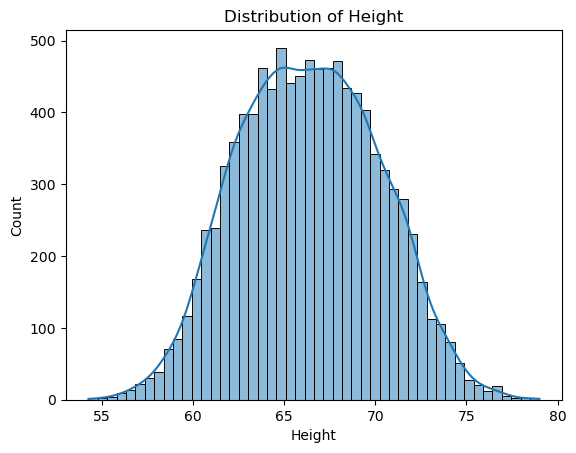

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


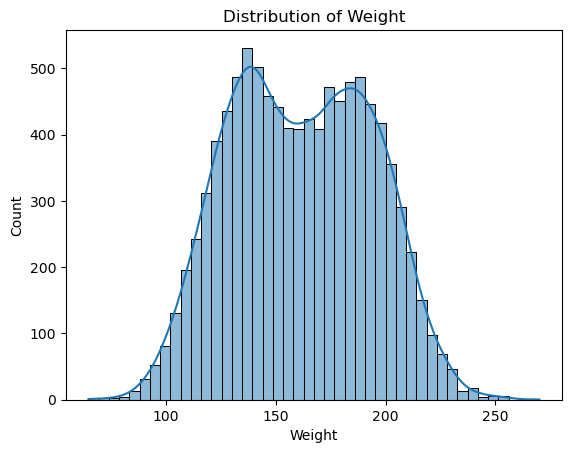

In [62]:
# Loop through columns with numerical data types
for column in df.columns:
    if df[column].dtype != 'object':  # Check if the column is not categorical
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

## We will detect outlier in height columns using the percentile method

In [63]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height'>

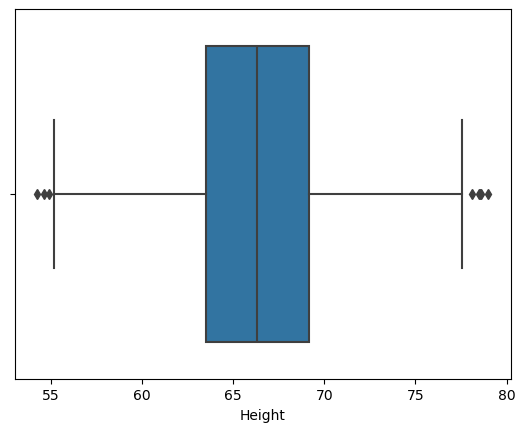

In [64]:
sns.boxplot(data=df,x='Height')
#There are outiler in height column

# Now we will decide a percentile threshold 
## i.e 1 percentile threhsold
## so value below 1 percentile and value above 99 percentile are outlier

In [65]:
lower_bound = df['Height'].quantile(0.01)
upper_bound = df['Height'].quantile(0.99)
print("Lower bound is : ", lower_bound)
print("upper bound is : ", upper_bound)


Lower bound is :  58.13441158671655
upper bound is :  74.7857900583366


In [66]:
# Rows with outlier values are
df[(df['Height']<lower_bound) | (df['Height']>upper_bound) ]
# There are 200 rows with outlier values

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# Trimming the data

In [67]:
new_df = df[(df['Height']>lower_bound) & (df['Height']<upper_bound) ]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [68]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [69]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

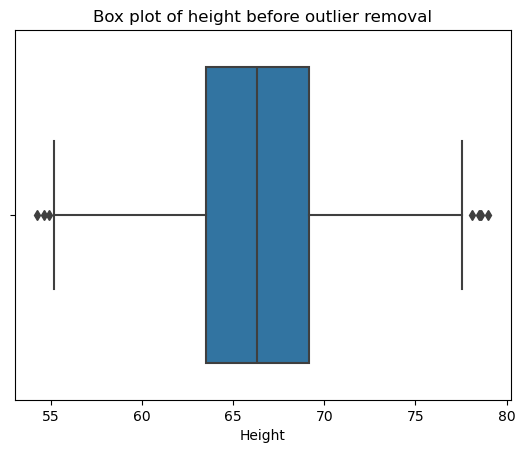

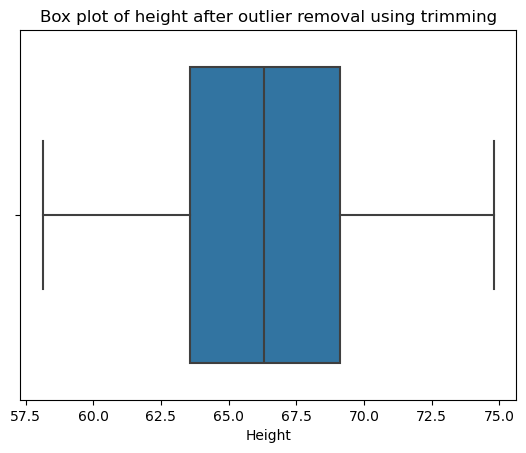

In [70]:
sns.boxplot(data=df,x='Height')
plt.title('Box plot of height before outlier removal')
plt.show()

sns.boxplot(data=new_df,x='Height')
plt.title('Box plot of height after outlier removal using trimming')
plt.show()

# Capping (Winsorization technique)

In [73]:
new_df2 = df.copy()
new_df2['Height']=np.where(
    df['Height']>upper_bound,
    upper_bound,
    np.where(
        df['Height'] < lower_bound,
        lower_bound,
        df['Height']
    )
)
new_df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [74]:
new_df2['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

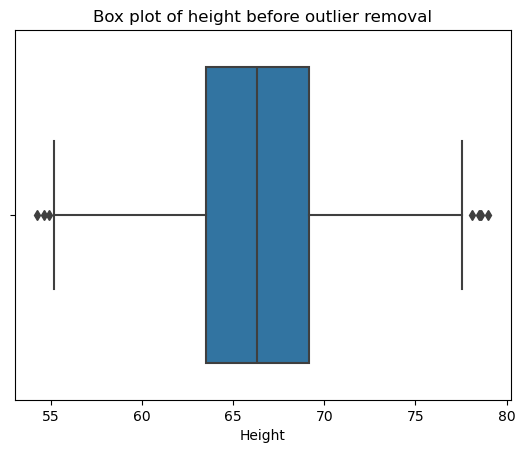

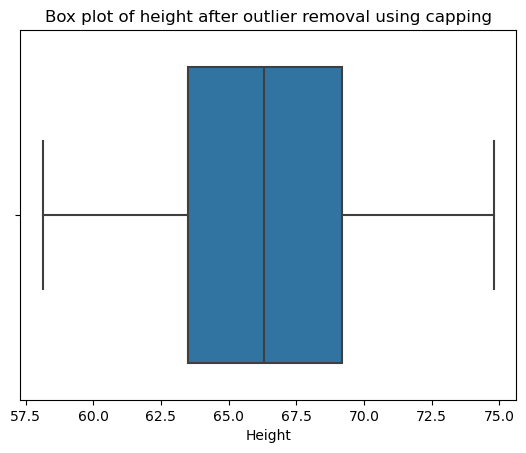

In [72]:
sns.boxplot(data=df,x='Height')
plt.title('Box plot of height before outlier removal')
plt.show()

sns.boxplot(data=new_df2,x='Height')
plt.title('Box plot of height after outlier removal using capping')
plt.show()